# PyTorch Computer Vision

* reference learning video notebook - https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/video_notebooks/03_pytorch_computer_vision_video.ipynb#scrollTo=SC8TASYkfG8P
* reference learning online book - https://www.learnpytorch.io/03_pytorch_computer_vision/

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [ ]:
import torch
from torch import nn

torch.__version__

'2.8.0+cpu'

In [ ]:
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

torchvision.__version__

'0.23.0+cpu'

`ToTensor` Convert a PIL Image or ndarray to tensor and scale the values accordingly. - https://docs.pytorch.org/vision/0.22/generated/torchvision.transforms.ToTensor.html

<br>

Converts a PIL Image or numpy.ndarray (H x W x C) in the range [0, 255] to a torch.FloatTensor of shape (C x H x W) in the range [0.0, 1.0] if the PIL Image belongs to one of the modes (L, LA, P, I, F, RGB, YCbCr, RGBA, CMYK, 1) or if the numpy.ndarray has dtype = np.uint8



In [ ]:
# !sudo rm -r 'data'

In [ ]:
train_data = datasets.FashionMNIST(

    root ='data',# where to download data to?
    train = True,
    download = True, #download data if it doesn't exist on disk
    transform=ToTensor(), # this converts img to tensor
    target_transform=None #transform the label/targe. By default it will come as multiclass int.

)

test_data = datasets.FashionMNIST(
    root = 'data',
    train = False, # now will only download test data
    transform = ToTensor(),
    target_transform=None

)


100%|██████████| 26.4M/26.4M [00:02<00:00, 11.5MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 208kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.88MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 21.9MB/s]


### what if we don't give None to target_transfor

If target_transform is set

The target will be passed through whatever transform you give.

This is useful if you want to:

Convert labels to one-hot encoding

Map integers to something else (e.g., class names)

Convert to float for loss functions that expect float labels

Example 1: Convert label to one-hot

In [ ]:
import torch

def one_hot_encode(label):
    return torch.nn.functional.one_hot(torch.tensor(label), num_classes=10).float()

dataset = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=one_hot_encode
)

image, target = dataset[0]
print(target)  # tensor([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]) if class = 0


#or ----------------------



labels_map = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot",
}

dataset = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=lambda y: labels_map[y]
)

image, target = dataset[0]
print(target)  # "T-shirt/top"


tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])
Ankle boot


### See the data

In [ ]:
#we got our data in data dir

#it is object so it doesn't have any .shape or .dtype
print(type(train_data))

<class 'torchvision.datasets.mnist.FashionMNIST'>


In [ ]:
len(train_data) , len(test_data)

(60000, 10000)

In [ ]:
train_data.data

tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        ...,

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0,

In [ ]:
#what are the classes are in targets

torch.unique(train_data.targets)

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
train_data.data.shape , test_data.data.shape

(torch.Size([60000, 28, 28]), torch.Size([10000, 28, 28]))

In [ ]:
train_data.targets.shape , test_data.targets.shape

(torch.Size([60000]), torch.Size([10000]))

It looks like we're dealing with 10 different kinds of clothes.



In [ ]:
#each target class has a name

class_names = train_data.classes
class_names


['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

This is like

T-shirt/top - 0

Trouser - 1

...

...

In [ ]:
## maping them one to one

class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

https://docs.pytorch.org/vision/stable/generated/torchvision.datasets.FashionMNIST.html#torchvision.datasets.FashionMNIST


returns image , target

In [ ]:
image , target = train_data[0]
image , target

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [ ]:
image.shape , target #target val is just 9 || image shape is (color channel * height * width)

(torch.Size([1, 28, 28]), 9)

[color_channels=1, height=28, width=28]


Having color_channels=1 means the image is grayscale.



In [ ]:
#finding what cloth is of this image

class_names[target]

'Ankle boot'

### visualizing image

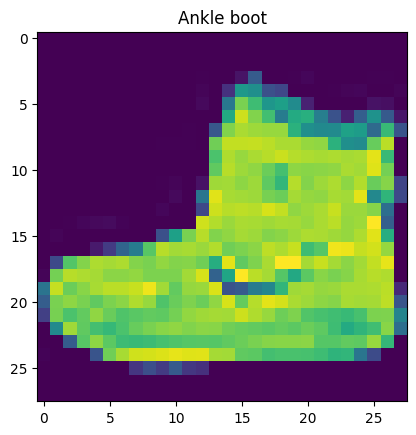

In [ ]:
image , label = train_data[0]
plt.imshow(image.squeeze()) ## becasue it doesn't take color channel
plt.title(class_names[label])
plt.show()


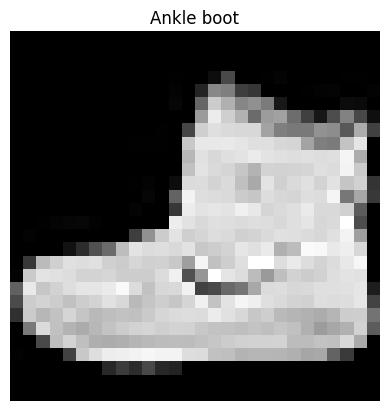

In [ ]:
#if we want to see grayscale

plt.imshow(image.squeeze() , cmap='gray')
plt.axis(False)
plt.title(class_names[label])
plt.show()

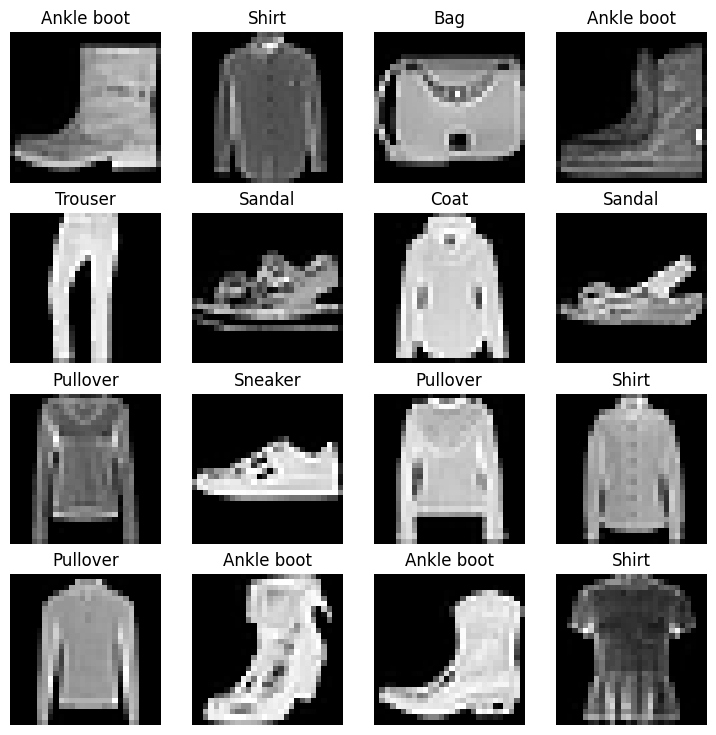

In [ ]:
## lets see moree

torch.manual_seed(42)

plt.figure(figsize=(9,9))
row , col = 4 , 4

for i in range (row * col ):

  random_indx = torch.randint(0 , len(train_data) , size=[1]).item() #we use item in torch to get the val as int otherwise it gives tensor dtype
  plt.subplot(row , col , i + 1 )

  image , label = train_data[random_indx]

  plt.imshow(image.squeeze() , cmap = 'gray')
  plt.title(class_names[label])
  plt.axis(False)

plt.show()


## Prepare DataLoader

https://docs.pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader

Turning our Dataset's into DataLoader's makes them iterable so a model can go through and learn the relationships between samples and targets (features and labels).



* It helps load data into a model.
For training and for inference.

* It turns a large Dataset into a Python iterable of smaller chunks.

* These smaller chunks are called batches or mini-batches and can be set by the batch_size parameter.



Why smaller chunk/batch?

* Because it's more computationally efficient.

* It also gives your model more opportunities to improve.

* Good batch size is 32 or powers of 2 eg 32, 64 , 128 etc


In [ ]:
#now lets created data loader

from torch.utils.data import DataLoader

batch_size = 32

train_dataloader = DataLoader(
    train_data,
    batch_size = batch_size, #sample per batch
    shuffle = True #shuffling data in every epoch
)

test_dataloader = DataLoader(
    test_data,
    batch_size = batch_size,
    shuffle = False #don't necessarily have to shuffle the testing data
)


train_dataloader , test_dataloader


(<torch.utils.data.dataloader.DataLoader at 0x7c50d1670b00>,
 <torch.utils.data.dataloader.DataLoader at 0x7c50db5926f0>)

In [ ]:
len(train_dataloader) , train_dataloader.batch_size , len(train_dataloader.dataset)

(1875, 32, 60000)

In [ ]:
type(train_dataloader) , train_dataloader.batch_size , train_dataloader.dataset

(torch.utils.data.dataloader.DataLoader,
 32,
 Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor())

In [ ]:
print(f"Length of train dataloader: {len(train_dataloader)} batches of {batch_size}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {batch_size}")

Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


In [ ]:
#1875 * 32 = 60000 = len(train_data)
#313 * 32 = 10000 = len(test_data)

In [ ]:
# Check out what's inside the training dataloader
train_features_batch , train_labels_batch = next(iter(train_dataloader))

train_features_batch.shape , train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

32 (1 * 28 * 28) images

In [ ]:
train_features_batch[0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0039, 0.0039, 0.0000, 0.0000, 0.0078, 0.0078, 0.0000,
          0.0000, 0.0039, 0.0078, 0.0000, 0.0000, 0.0000,

In [ ]:
train_labels_batch

tensor([5, 1, 8, 1, 5, 2, 6, 7, 3, 5, 9, 5, 7, 5, 0, 4, 4, 4, 4, 6, 1, 8, 0, 1,
        9, 7, 8, 8, 3, 3, 7, 2])

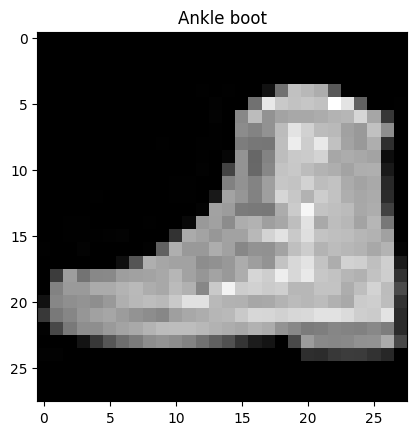

In [ ]:
#those are same data from train_data | we can check

plt.imshow(train_features_batch[10].squeeze() , cmap = 'gray')
plt.title(class_names[train_labels_batch[10]])
plt.show()

## 3. BaseLine model

Our baseline will consist of two nn.Linear() layers.

We've done this in a previous section but there's going to be one slight difference.

Because we're working with image data, we're going to use a different layer to start things off.

And that's the nn.Flatten() layer.

nn.Flatten() compresses the dimensions of a tensor into a single vector.

In [ ]:
#ex of nn.Flatten()
flatten_model = nn.Flatten()

x = train_features_batch

output = flatten_model(x)

# Print out what happened
print(f"Shape before flattening: {x.shape} -> [color_channels, height, width]")
print(f"Shape after flattening: {output.shape} -> [color_channels, height*width]")



Shape before flattening: torch.Size([32, 1, 28, 28]) -> [color_channels, height, width]
Shape after flattening: torch.Size([32, 784]) -> [color_channels, height*width]


so `flatten` converts it 1D matrix just like our prev regression classification features

`nn.Flatten()` compresses the dimensions of a tensor into a single vector.



## But we see 2d matrix and vector is 1D matrix, then how it is vector?



---
### 🔹 1. Mathematical definitions

* **Scalar** → single number (0D tensor)
* **Vector** → 1D array of numbers (1D tensor), e.g. `[784]`
* **Matrix** → 2D array of numbers (2D tensor), e.g. `[28, 28]`
* **Tensor** → generalization to any dimensions (0D, 1D, 2D, 3D, …)

---

### 🔹 2. What PyTorch does

PyTorch **always keeps a batch dimension**, even for a single sample.

That’s why for **one image**:

```python
x.shape = [1, 28, 28]   # 1 channel, height=28, width=28
```

After flattening:

```python
output.shape = [1, 784]
```

* That **`1` is not a real vector dimension**. It’s the *batch dimension*.
* The actual vector of features is `[784]`.
* PyTorch just wraps it as `[batch_size, num_features]`.

So:

* `[784]` → true 1D vector of 784 pixels
* `[1, 784]` → a **matrix** with 1 row and 784 columns, but really just a *batch of one vector*.

---

### 🔹 3. Why this happens

`nn.Linear` expects input of shape:

```
[batch_size, in_features]
```

* If you pass 32 images → `[32, 784]`
* If you pass 1 image → `[1, 784]`

So PyTorch always gives you a 2D tensor for consistency.

---

✅ **In short:**

* A vector is *conceptually* 1D (`[784]`).
* But in practice, deep learning libraries almost always wrap it with a batch dimension (`[1, 784]`).
* So `[1, 784]` is a "batch of 1 vector".

---

## now creating model

In [ ]:
#now we are feeding our model 2d matrix 32 * 784 where each row represents a img just like in regression model we had 2D matrix of features

class FashionMNISTModelV0(nn.Module):
  def __init__(self , input_shape , hidden_unit , output_shape):
    super().__init__()
    self.my_model = nn.Sequential(
        nn.Flatten(), # making input a vector(1d matrix)
        nn.Linear(in_features = input_shape , out_features = hidden_unit),
        nn.Linear(in_features = hidden_unit , out_features = output_shape),

    )

  def forward(self , x):
    return self.my_model(x)

In [ ]:
#creating instance of our model

torch.manual_seed(42)

model_0 = FashionMNISTModelV0(
    input_shape = 28*28,
    hidden_unit = 10,
    output_shape = len(class_names)
)


model_0 , model_0.state_dict()


(FashionMNISTModelV0(
   (my_model): Sequential(
     (0): Flatten(start_dim=1, end_dim=-1)
     (1): Linear(in_features=784, out_features=10, bias=True)
     (2): Linear(in_features=10, out_features=10, bias=True)
   )
 ),
 OrderedDict([('my_model.1.weight',
               tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                       [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                       [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                       ...,
                       [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                       [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                       [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
              ('my_model.1.bias',
               tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                        0.0018,  0.0163])),
              ('my_model.2

### creating loss function and optimizer

In [ ]:
#as it is classification problem

loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params = model_0.parameters() , lr = 0.1)

In [ ]:
# downloading our helper function for plot ,accuracy metrics etc

import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

In [ ]:
torch.device

torch.device

Loss function and optimizer ready!

It's time to start training a model.

But how about we do a little experiment while we train.

I mean, let's make a timing function to measure the time it takes our model to train on CPU versus using a GPU.

We'll train this model on the CPU but the next one on the GPU and see what happens.

Our timing function will import the `timeit.default_timer()` function from the Python timeit module.

In [ ]:
from timeit import default_timer as timer
def print_train_time(start: float, end: float, device: torch.device = None):
    """Prints difference between start and end time.

    Args:
        start (float): Start time of computation (preferred in timeit format).
        end (float): End time of computation.
        device ([type], optional): Device that compute is running on. Defaults to None.

    Returns:
        float: time between start and end in seconds (higher is longer).
    """
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

In [ ]:
# ex:
#timeit gives processor execution time while time.time() gives overall time(cpu + idle)
from timeit import default_timer as timer

start_time = timer()

for i in range(int(1e5)):
  pass

end_time = timer()

print_train_time(start_time , end_time , device="cpu" )

Train time on cpu: 0.003 seconds


0.0027376900000035675

In [ ]:
#or we could also use jupyter magic function
# this gives both : processor time  as well as wall time
%%time
for i in range(int(1e5)):
  pass


CPU times: user 2.71 ms, sys: 0 ns, total: 2.71 ms
Wall time: 2.71 ms


### 3.3 Creating training loop

will be using the same steps as the previous notebook(s), though since our data is now in batch form, we'll add another loop to loop through our data batches.

And since we're computing on batches of data, our loss and evaluation metrics will be calculated per batch rather than across the whole dataset.



In [ ]:
#we will use a little py package for showing beautifull progresss bar in our training loop
#here is how it would look like
from tqdm.auto import tqdm

for i in tqdm(range(int(1e7))):
  if(i % 1000000 == 0) :
    print('hi')
  # time.sleep(0.001)   # simulate some work


  0%|          | 0/10000000 [00:00<?, ?it/s]

hi
hi
hi
hi
hi
hi
hi
hi
hi
hi


since we're computing on batches of data, our loss and evaluation metrics will be calculated per batch rather than across the whole dataset.

In [ ]:
def accuracy_fn(y_preds , y_true):
  correct = torch.eq(y_preds, y_true).sum().item()
  return (correct / len(y_true)) * 100

In [ ]:
from timeit import default_timer as timer

torch.manual_seed(42)

from tqdm.auto import tqdm

start_time = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-------")

  train_loss = 0
  train_acc = 0

  model_0.train() #recommended here, not in the innder loop. Tough using there won't be big prob. will just cause overhead

  for batch , (X, y) in enumerate(train_dataloader): #this loop will run 1875 times

    y_pred = model_0(X)

    loss = loss_fn(y_pred , y)
    acc = accuracy_fn(y_pred.argmax(dim = 1) , y )

    train_loss += loss.item() #loss is a tensor, not a scalar. || don't know but without .item() it also worked
    train_acc += acc

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if batch % 400 == 0:
      print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

  train_loss = train_loss / len(train_dataloader)
  train_acc = train_acc / len(train_dataloader)

  test_loss , test_acc = 0 , 0

  model_0.eval()

  with torch.inference_mode():

    for X , y in test_dataloader:

      test_pred = model_0(X)

      test_loss += loss_fn(test_pred , y)
      test_acc += accuracy_fn(test_pred.argmax(dim = 1) , y)

    test_loss = test_loss / len(test_dataloader)
    test_acc = test_acc / len(test_dataloader)

  print(f'Train loss : {train_loss:.2f} | Train acc: {train_acc:.2f}% | Test loss : {test_loss:.2f} | test acc : {test_acc:.2f}%'  )


end_time = timer()

total_train_time_model_0 = print_train_time(start = start_time , end = end_time , device = next(model_0.parameters()).device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss : 0.59 | Train acc: 79.17% | Test loss : 0.51 | test acc : 82.04%
Epoch: 1
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss : 0.48 | Train acc: 83.32% | Test loss : 0.48 | test acc : 83.20%
Epoch: 2
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss : 0.46 | Train acc: 84.05% | Test loss : 0.48 | test acc : 83.43%
Train time on cpu: 66.692 seconds


### Make prediction using `model_0`

In [ ]:
model_0.__class__.__name__

'FashionMNISTModelV0'

In [ ]:
#now lets make a general function to eval any model

def eval_model(
    model : torch.nn.Module,
    data_loader : torch.utils.data.DataLoader,
    device,
    loss_fn : torch.nn.Module,
    accuracy_fn):

  model.eval()
  model.to(device)

  with torch.inference_mode():
    acc = 0
    loss = 0

    for X , y in data_loader:

      X, y = X.to(device) , y.to(device)

      y_pred = model(X)

      loss += loss_fn(y_pred , y).item()
      acc += accuracy_fn(y_pred.argmax(dim = 1) , y)

    acc = acc / len(data_loader)
    loss = loss / len(data_loader)

    return {
        'model_name' : model.__class__.__name__ ,# only works when model was created with a class
        'model_loss' : loss,
        'model_acc' : acc
    }




In [ ]:
model_0_result = eval_model(
    model = model_0,
    data_loader = test_dataloader,
    device = 'cpu',
    loss_fn = loss_fn,
    accuracy_fn = accuracy_fn
 )

model_0_result

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663890758451943,
 'model_acc': 83.42651757188499}

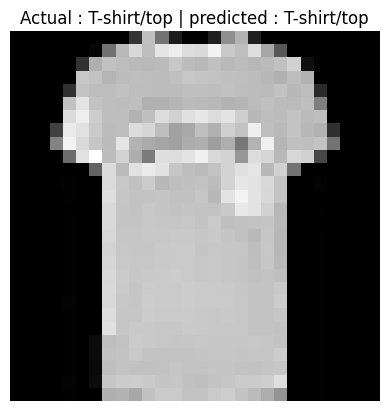

In [ ]:
#lets see some ex of our mode
test_features_batch, test_label_batch  = next(iter(test_dataloader))

model_0.eval()
with torch.inference_mode():
  predicted_features_batch = model_0(test_features_batch)


indx = 19
plt.imshow(test_features_batch[indx].squeeze() , cmap='gray')
plt.title(f'Actual : {class_names[test_label_batch[indx]]} | predicted : {class_names[predicted_features_batch[indx].argmax()]}')

plt.axis(False)

plt.show()

## Setup device agnostic code

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [ ]:
#building model
#wiil be using non linearity in this model

class fashionMNISTModelV1(nn.Module):
  def __init__(self , input_shape , hidden_unit, output_shape):
    super().__init__()

    self.my_model = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = input_shape , out_features = hidden_unit),
        nn.ReLU(),
        nn.Linear(in_features=hidden_unit , out_features=output_shape),
        nn.ReLU() #this is not recommended using activtion in the last layer
    )

  def forward(self , x):
    return self.my_model(x)



In [ ]:
torch.manual_seed(42)

model_1 = fashionMNISTModelV1(
    input_shape=28*28,
    hidden_unit=10,
    output_shape= len(class_names)
)

model_1.to(device)

fashionMNISTModelV1(
  (my_model): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
  )
)

In [ ]:
#checking model in which device

next(model_1.parameters()).device

device(type='cpu')

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_1.parameters() , lr = 0.1)

In [ ]:

#now creating training and testing loop

def training_loop(
    model,
    optimizer,
    data_loader,
    loss_fn,
    device,
    accuracy_fn):
  train_loss , train_acc = 0 , 0
  model.to(device)

  model.train()

  for batch , (X, y) in enumerate(data_loader):

    X , y = X.to(device) , y.to(device)


    y_pred = model(X)

    loss = loss_fn(y_pred , y)
    train_loss += loss
    train_acc += accuracy_fn(y_pred.argmax(dim = 1) , y)

    optimizer.zero_grad()

    loss.backward()
    optimizer.step()

    if(batch % 400 == 0):
      print(f'Trained on {batch * len(y)}/{len(data_loader.dataset)}')

  train_loss /= len(data_loader)
  train_acc  /= len(data_loader)

  print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")


In [ ]:
def testing_loop(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):

    test_loss, test_acc = 0, 0
    model.to(device)

    model.eval() # put model in eval mode
    # Turn on inference context manager

    with torch.inference_mode():

        for X, y in data_loader:
            # Send data to GPU
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred = model(X)

            # 2. Calculate loss and accuracy
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_preds=test_pred.argmax(dim=1),# Go from logits -> pred labels
                                    y_true=y
            )

        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

In [ ]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

epochs = 3



for epoch in tqdm(range(epochs)):

    print(f"Epoch: {epoch}\n---------")
    training_loop(data_loader=train_dataloader,
        model=model_1,
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn,
        device= device
    )

    testing_loop(data_loader=test_dataloader,
        model=model_1,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn,
        device = device
    )

train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Trained on 0/60000
Trained on 12800/60000
Trained on 25600/60000
Trained on 38400/60000
Trained on 51200/60000
Train loss: 1.09199 | Train accuracy: 61.34%
Test loss: 0.95636 | Test accuracy: 65.00%

Epoch: 1
---------
Trained on 0/60000
Trained on 12800/60000
Trained on 25600/60000
Trained on 38400/60000
Trained on 51200/60000
Train loss: 0.78101 | Train accuracy: 71.93%
Test loss: 0.72227 | Test accuracy: 73.91%

Epoch: 2
---------
Trained on 0/60000
Trained on 12800/60000
Trained on 25600/60000
Trained on 38400/60000
Trained on 51200/60000
Train loss: 0.67027 | Train accuracy: 75.94%
Test loss: 0.68500 | Test accuracy: 75.02%

Train time on cpu: 63.327 seconds


In [ ]:
print(f'Train time on cpu: {total_train_time_model_0}')
print(f'Train time on gpu: {total_train_time_model_1}')

Train time on cpu: 66.69164551199992
Train time on gpu: 63.32679486100005


In `cpu` it took : Train time on cpu: 27.328 seconds

And now in  `gpu` it took : Train time on cuda: 28.972 seconds

So why take longer in `gpu`

> **Note:** Sometimes, depending on your data/hardware you might find that your model trains faster on CPU than GPU.
>
> Why is this?
>
> 1. It could be that the overhead for copying data/model to and from the GPU outweighs the compute benefits offered by the GPU (when dataset is small like ours(yes, ours is considered small )).
> 2. The hardware you're using has a better CPU in terms compute capability than the GPU.
>
> For more on how to make your models compute faster, see here: https://horace.io/brrr_intro.html

In [ ]:
model_1_result = eval_model(
    model = model_1,
    data_loader = test_dataloader,
    device = device,
    loss_fn = loss_fn,
    accuracy_fn = accuracy_fn
)

model_1_result , model_0_result

({'model_name': 'fashionMNISTModelV1',
  'model_loss': 0.6850009785292629,
  'model_acc': 75.01996805111821},
 {'model_name': 'FashionMNISTModelV0',
  'model_loss': 0.47663890758451943,
  'model_acc': 83.42651757188499})

it looks like adding non-linearities to our model made it perform worse than the baseline.

That's a thing to note in machine learning, sometimes the thing you thought should work doesn't.

And then the thing you thought might not work does.

It's part science, part art.

From the looks of things, it seems like our model is overfitting on the training data.

Overfitting means our model is learning the training data well but those patterns aren't generalizing to the testing data.

Two of the main ways to fix overfitting include:

Using a smaller or different model (some models fit certain kinds of data better than others).
Using a larger dataset (the more data, the more chance a model has to learn generalizable patterns).


## Building a convulational neural network

CNN's are known for their capabilities to find patterns in visual data.

And since we're dealing with visual data, let's see if using a CNN model can improve upon our baseline.

The CNN model we're going to be using is known as TinyVGG from the CNN Explainer website.

It follows the typical structure of a convolutional neural network:

let's now build a CNN that replicates the model on the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).



In [ ]:
import torch
from torch import nn

class fashionMNISTModelV2(nn.Module):
  """
  Model architecture copying TinyVGG from:
  https://poloclub.github.io/cnn-explainer/

  """

  def __init__(self , input_shape , hidden_unit, output_shape):
    super().__init__()

    #first block of cnn explainer ex
    self.block1 = nn.Sequential(

        # Create a conv layer - https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html


        #|| our train data shape is (32x1x28x28)
        nn.Conv2d(
            in_channels = input_shape,
            out_channels = hidden_unit,
            kernel_size = 3,
            stride = 1,
            padding = 1
        ),

        #having padding = 1, shape become 32x1x30x30
        #and when kernel_size 3 the shape down by 2.
        #now shape = (32x1x28x28)


        nn.ReLU(),

        #relu doesn't change shape. shape remains : (32x1x28x28)


        nn.Conv2d(
            in_channels = hidden_unit,
            out_channels = hidden_unit,
            kernel_size = 3,
            stride = 1,
            padding = 1
        ),

        #having padding = 1 shape become 32x1x30x30
        #and when kernel_size 3 the shape down by 2.
        #now shape = (32x1x28x28)


        nn.ReLU(),

        #relu doesn't change shape. shape remains : (32x1x28x28)

        # create a maxpol layer - https://docs.pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html

        nn.MaxPool2d(
            kernel_size = 2
        )

        #when kernel_size = 2, shape gets halves
        #now shape (32x1x14x14)

    )

    #second block | shape (32x1x14x14)
    self.block2 = nn.Sequential(
        nn.Conv2d(
            in_channels = hidden_unit,
            out_channels = hidden_unit,
            kernel_size = 3,
            stride = 1,
            padding = 1
        ),

        #new shape : (32x1x14x14)

        nn.ReLU(),

        #new shape : (32x1x14x14)

        nn.Conv2d(
            in_channels = hidden_unit,
            out_channels = hidden_unit,
            kernel_size = 3,
            stride = 1,
            padding = 1
        ),

        #new shape : (32x1x14x14)


        nn.ReLU(),

        #new shape : (32x1x14x14)

        nn.MaxPool2d(
            kernel_size = 2
        )

        #new shape : (32x1x7x7)


    )

    #now our normal flow

    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(
            in_features = hidden_unit * 7 * 7,
            out_features = output_shape
        )
    )

  def forward(self , x):
    x = self.block1(x)
    # print(f"OUtput shape of block 1 : {x.shape}")

    x = self.block2(x)
    # print(f"OUtput shape of block 2 : {x.shape}")

    x = self.classifier(x)
    # print(f"OUtput shape of classifier : {x.shape}")

    return x


In [ ]:
torch.manual_seed(42)

model_2 = fashionMNISTModelV2(
    input_shape = 1, #Number of channels in the input image || in our case color chanel is 1
    hidden_unit = 10, #up to us
    output_shape = 10 #10 classes
)

### To test the layers out, let's create some toy data just like the data used on CNN Explainer.



In [ ]:
torch.manual_seed(42)

images = torch.randn(size = (32 , 3, 7, 64)) # 32 batch of images(color , height , width)

test_image = images[0] #taking the first one of the batch

print(f"Image batch shape: {images.shape} -> [batch_size, color_channels, height, width]")
print(f"Single image shape: {test_image.shape} -> [color_channels, height, width]")


Image batch shape: torch.Size([32, 3, 7, 64]) -> [batch_size, color_channels, height, width]
Single image shape: torch.Size([3, 7, 64]) -> [color_channels, height, width]


In [ ]:
torch.manual_seed(42)

conv_layer = nn.Conv2d(
    in_channels=3, # as single image has 3 color channel
    out_channels=10, #as our wish,
    kernel_size=3,
    stride=1,
    padding=0)


conv_img = conv_layer(test_image)

conv_img.shape



torch.Size([10, 5, 62])

In [ ]:
conv_layer.state_dict()['weight'].shape

torch.Size([10, 3, 3, 3])

In [ ]:
torch.manual_seed(42)

test_shape = torch.randn(size = (3, 7, 7))  #expects 3d or 4d tensor | 2d won't work

test_conv = nn.Conv2d(
    in_channels=3,
    out_channels=10,
    kernel_size=3,
    stride=1,
    padding=0
)

conv_img = test_conv(test_shape)
conv_img.shape , test_conv.state_dict()['weight'].shape

(torch.Size([10, 5, 5]), torch.Size([10, 3, 3, 3]))

### now maxpoll2d

Here if the kernel_size is 2 and let the strite as default(which is kernel_size), then its half the dimension as it takes max val out of 2x2 matrix


if `kernel_size` is 3 , dimension get one third, if 4 , we get one fourth

In [ ]:
test_maxpool = nn.MaxPool2d(kernel_size=3)

test_shape2 = torch.randn(size= (2, 30,40))  #expects 3d or 4d tensor | > 4d <3d  won't work

maxpool_tensor = test_maxpool(test_shape2)

maxpool_tensor.shape


torch.Size([2, 10, 13])

In [ ]:
maxpool_tensor2 = test_maxpool(torch.randn(size = (10, 12, 41 , 41)))

maxpool_tensor2.shape

torch.Size([10, 12, 13, 13])

Also notice the value leftover in `maxpool_tensor` and `maxpool_tensor2` is the maximum value from random_tensor.


This means, that from the point of view of a neural network, intelligence is compression.

This is the idea of the use of a nn.MaxPool2d() layer: take the maximum value from a portion of a tensor and disregard the rest.

In essence, lowering the dimensionality of a tensor whilst still retaining a (hopefully) significant portion of the information.

It is the same story for a nn.Conv2d() layer.

Except instead of just taking the maximum, the nn.Conv2d() performs a convolutional operation on the data (see this in action on the CNN Explainer webpage).


### extra: looking to `nn.AvgPool2d()`

In [ ]:
test_avgpool = nn.AvgPool2d(kernel_size = 2)
test_tensor = torch.randn(size= (1,2,2))
test_tensor


tensor([[[0.0298, 0.5246],
         [0.5877, 0.3456]]])

In [ ]:
avgpool_tensor = test_avgpool(test_tensor)

avgpool_tensor , avgpool_tensor.shape , torch.mean(test_tensor, )

(tensor([[[0.3719]]]), torch.Size([1, 1, 1]), tensor(0.3719))

In [ ]:
test_avgpool = nn.AvgPool2d(kernel_size = 2)
test_tensor = torch.randn(size= (4,5,7))

avgpool_tensor = test_avgpool(test_tensor)

avgpool_tensor.shape


torch.Size([4, 2, 3])

In [ ]:
#loss funcition and optimizer

loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params = model_2.parameters() , lr = 0.1)

In [ ]:
from timeit import default_timer
from tqdm.auto import tqdm
torch.manual_seed(42)

epochs = 3

train_time_start_model_2 = timer()

for epoch in tqdm(range(epochs)):

  training_loop(
      model = model_2,
      optimizer = optimizer,
      data_loader = train_dataloader,
      loss_fn = loss_fn,
      device = device,
      accuracy_fn=accuracy_fn
  )

  testing_loop(
      data_loader = test_dataloader,
      model= model_2,
      loss_fn = loss_fn,
      accuracy_fn = accuracy_fn,
      device = device
  )

train_time_end_model_2 = timer()

total_train_time_model_2 = print_train_time(
    train_time_start_model_2,
    train_time_end_model_2,
    device = device
)



  0%|          | 0/3 [00:00<?, ?it/s]

Trained on 0/60000
Trained on 12800/60000
Trained on 25600/60000
Trained on 38400/60000
Trained on 51200/60000
Train loss: 0.59329 | Train accuracy: 78.51%
Test loss: 0.39866 | Test accuracy: 85.84%

Trained on 0/60000
Trained on 12800/60000
Trained on 25600/60000
Trained on 38400/60000
Trained on 51200/60000
Train loss: 0.36321 | Train accuracy: 87.00%
Test loss: 0.35629 | Test accuracy: 86.92%

Trained on 0/60000
Trained on 12800/60000
Trained on 25600/60000
Trained on 38400/60000
Trained on 51200/60000
Train loss: 0.32339 | Train accuracy: 88.32%
Test loss: 0.32518 | Test accuracy: 88.27%

Train time on cpu: 138.273 seconds


> note: `model_2` on `cpu` took 193.387685s

> and in `gpu` it took 36.525639s

In [ ]:
model_2_result = eval_model(
    model = model_2,
    data_loader=test_dataloader,
    loss_fn = loss_fn,
    accuracy_fn= accuracy_fn,
    device = device
)

model_2_result

{'model_name': 'fashionMNISTModelV2',
 'model_loss': 0.32517807734326815,
 'model_acc': 88.26876996805112}

## 8. comparing model result and training time

In [ ]:
compare_result = pd.DataFrame([model_0_result, model_1_result , model_2_result])

compare_result

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.476639,83.426518
1,fashionMNISTModelV1,0.685001,75.019968
2,fashionMNISTModelV2,0.325178,88.268770


In [ ]:
compare_result['training_time'] = [
    total_train_time_model_0,
    total_train_time_model_1,
    total_train_time_model_2
]

compare_result

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.476639,83.426518,66.691646
1,fashionMNISTModelV1,0.685001,75.019968,63.326795
2,fashionMNISTModelV2,0.325178,88.268770,138.272511


## make and evaluate random predictoin with best model

###random.sample() in py

random.sample(population, k)

Returns a new list containing k unique elements randomly chosen without replacement from the given population.

It never repeats the same element, unlike random.choices() which allows repetition.

### ---

In [ ]:

import random
random.seed(40)

test_samples = []
test_labels = []

for sample , label in random.sample(list(test_data), k = 12):
  test_samples.append(sample)
  test_labels.append(label)

test_samples[0].shape


torch.Size([1, 28, 28])

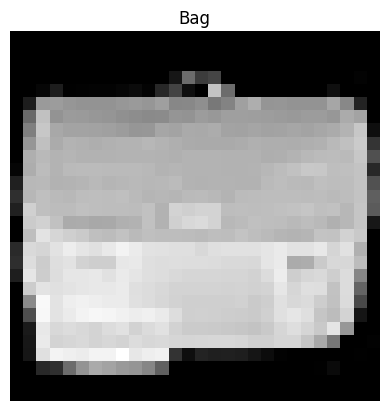

In [ ]:

#lets see one from test data

plt.imshow(test_samples[0].squeeze() , cmap='gray')
plt.title(class_names[test_labels[0]])
plt.axis(False)
plt.show()

In [ ]:
def make_prediction(model , test_samples , device):
  predictions = []

  model.to(device)

  model.eval()

  with torch.inference_mode():
    for sample in test_samples:
    #add a batch as model expects
      sample = torch.unsqueeze(sample ,dim = 0).to(device)

      pred_logit = model(sample)

      pred = torch.squeeze(pred_logit).argmax().cpu().item()

      predictions.append(pred)



  return predictions



In [ ]:
pred_class = make_prediction(
    model = model_2,
    test_samples=test_samples,
    device = device
)

pred_class

[8, 0, 9, 8, 2, 4, 0, 5, 7, 1, 4, 8]

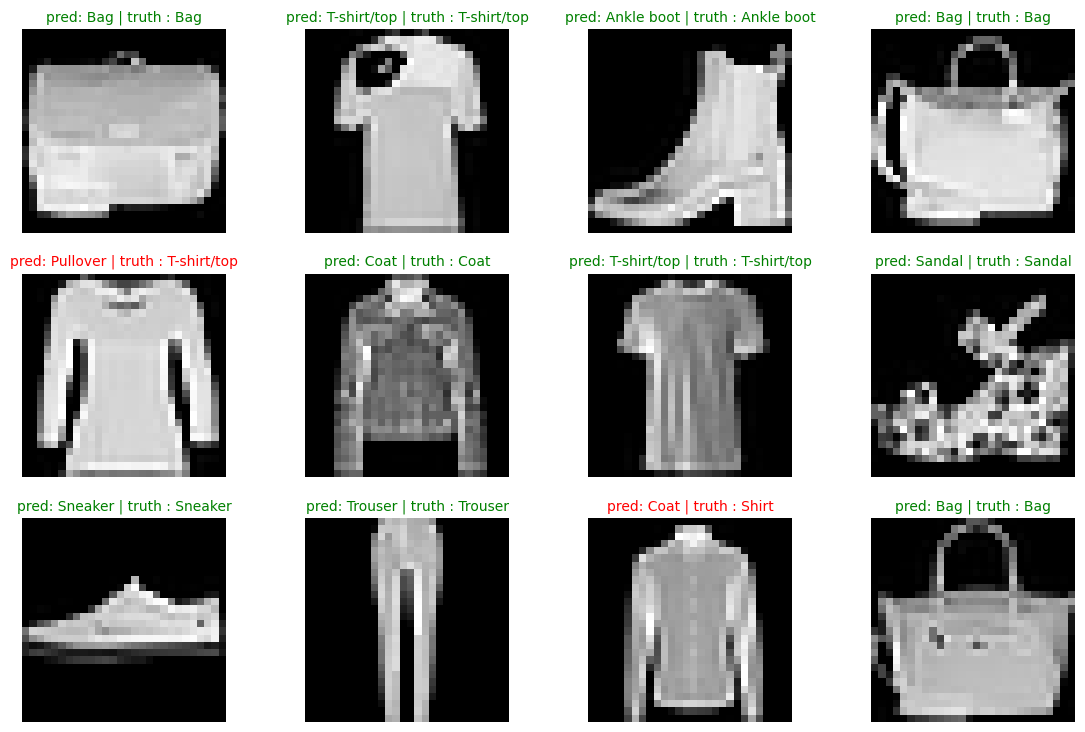

In [ ]:
#plot prediction:

plt.figure(figsize=(14,9))

rows = 3
cols = 4

for i , sample in enumerate(test_samples):

  plt.subplot(rows, cols , i + 1)

  #plotting the image:
  plt.imshow(sample.squeeze() , cmap = 'gray')

  pred_label = class_names[pred_class[i]]

  truth_label = class_names[test_labels[i]]

  title_text = f"pred: {pred_label} | truth : {truth_label}"

  if pred_label == truth_label:
    plt.title(title_text, fontsize = 10 , c='g')
  else:
    plt.title(title_text , fontsize = 10 , c = 'r')

  plt.axis(False)

## classification matrix

In [ ]:
# Import tqdm.auto
from tqdm.auto import tqdm


# 1. Make predictions with trained model
y_preds = []
model_2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions..."):
    # Send the data and targets to target device
    X, y = X.to(device), y.to(device)
    # Do the forward pass
    y_logit = model_2(X)
    # Turn predictions from logits -> prediction probabilities -> prediction labels
    y_pred = torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1)
    # Put prediction on CPU for evaluation
    y_preds.append(y_pred.cpu())

# Concatenate list of predictions into a tensor
# print(y_preds)
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor

Making predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1,  ..., 8, 1, 8])

In [ ]:
y_preds[len(y_preds)-2:len(y_preds)] , len(y_preds)

([tensor([8, 2, 9, 3, 9, 0, 0, 4, 1, 2, 6, 6, 6, 1, 3, 9, 7, 6, 2, 6, 2, 9, 7, 8,
          5, 6, 9, 6, 0, 3, 8, 1]),
  tensor([3, 2, 7, 5, 8, 4, 6, 2, 8, 9, 1, 9, 1, 8, 1, 8])],
 313)

In [ ]:
y_pred_tensor , len(y_pred_tensor)

(tensor([9, 2, 1,  ..., 8, 1, 8]), 10000)

In [ ]:
y_pred_tensor.shape

torch.Size([10000])

In [ ]:
# See if required packages are installed and if not, install them...
try:
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")
  assert int(mlxtend.__version__.split(".")[1] >= 19, "mlxtend version should be 0.19.0 or higher")
except:
  !pip install torchmetrics -U mlxtend
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 64.9 MB/s eta 0:00:00


/usr/local/lib/python3.12/dist-packages/torch_xla/experimental/gru.py:113: SyntaxWarning: invalid escape sequence '\_'
  * **h_n**: tensor of shape :math:`(D * \text{num\_layers}, H_{out})` or


mlxtend version: 0.23.4


In [ ]:
import mlxtend
print(mlxtend.__version__)

0.23.4


In [ ]:
#actual vals:
test_data.targets

tensor([9, 2, 1,  ..., 8, 1, 5])

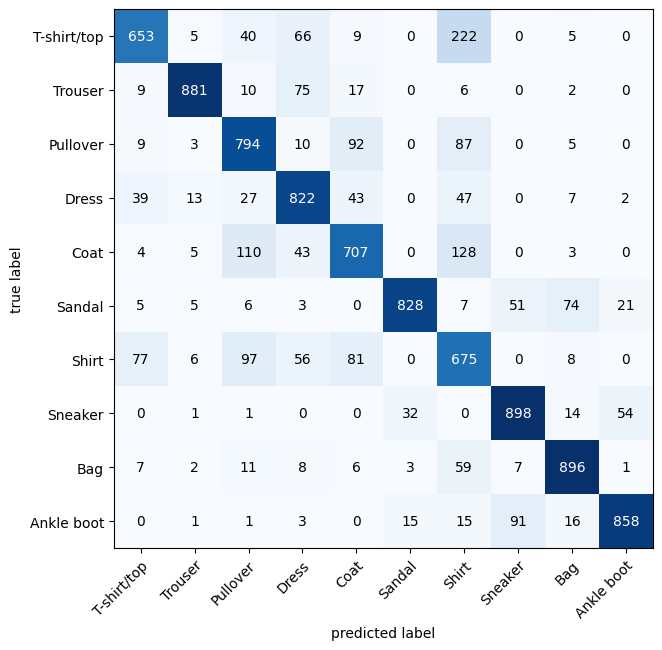

In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

#initialize
cofmat = ConfusionMatrix(num_classes = len(class_names) , task = 'multiclass')
#comparing one to other, creating confusion matrix
confmat_tensor = cofmat(preds = y_pred_tensor ,  target = test_data.targets)

#ploting

fig , ax = plot_confusion_matrix(
    conf_mat = confmat_tensor.numpy(),
    class_names = class_names,
    figsize = (10 , 7)
)



## save and load model

In [ ]:
from pathlib import Path

MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents = True , exist_ok = True)

MODEL_NAME = 'pytorch04_computer_vision.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

torch.save(
    obj = model_2.state_dict(),
    f = MODEL_SAVE_PATH
)

print(f'Model saved to : {MODEL_SAVE_PATH}')

Model saved to : models/pytorch04_computer_vision.pth


In [ ]:
##load model


#first creating instance

# Note: loading model will error if the shapes here aren't the same as the saved version
loaded_model_2 = fashionMNISTModelV2(
    input_shape = 1,
    hidden_unit = 10,
    output_shape = 10
)

loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

loaded_model_2 = loaded_model_2.to(device)

In [ ]:
# Evaluate loaded model
torch.manual_seed(42)

loaded_model_2_result = eval_model(
    model=loaded_model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
    device = device
)

loaded_model_2_result

{'model_name': 'fashionMNISTModelV2',
 'model_loss': 0.32517807734326815,
 'model_acc': 88.26876996805112}

In [ ]:
model_2_result

{'model_name': 'fashionMNISTModelV2',
 'model_loss': 0.32517807734326815,
 'model_acc': 88.26876996805112}

In [ ]:
# Check to see if results are close to each other (if they are very far away, there may be an error)
torch.isclose(torch.tensor(model_2_result["model_loss"]),
              torch.tensor(loaded_model_2_result["model_loss"]),
              atol=1e-08, # absolute tolerance
              rtol=0.0001) # relative tolerance

tensor(True)